# Fin Flutter

## Review of Fins

- fins are used to stabilize the rocket...
- diagram/illustration
- a theoretically ideal fin is infinitely strong, infinitely stiff, and infinitely thin. But in reality, a super thin fin would be too fragile. Thickner fins are more robust, but also heavier and induce more drag
- names of the dimensions of a fin (and all the akas)

## Introduction to Fin Flutter

Fin flutter is ...

## Determining Critical Fin Flutter Speeds

- different ways to calculate it, including an interactive visualization calling the function(s) in fin_flutter_calc.py which will help give intuition on the main drivers of how it works
- flutter speed vs divergence speed
- for composites (anisotropic), use the shear modulus that's parallel to the fibers. In that axis, the modulus depends more on the resin than the fibers. Talk about determining shear modulus for composites, how it's exceedingly hard for sandwich composites
- example values for different materials

cite sources, especially PoF 291, 411, and 615

### Using Peak of Flight Issue 615 to Calculate Fin Flutter Speed

Talk about it

including that there's a little "bonus" from flutter speed increasing as you go up and the air gets denser combined with the rocket going its fastest near the end of motor burn

mention outputting a set of points from ork

talk about assumptions in fin_flutter_calc.py
- constant thickness

885.3365568040937


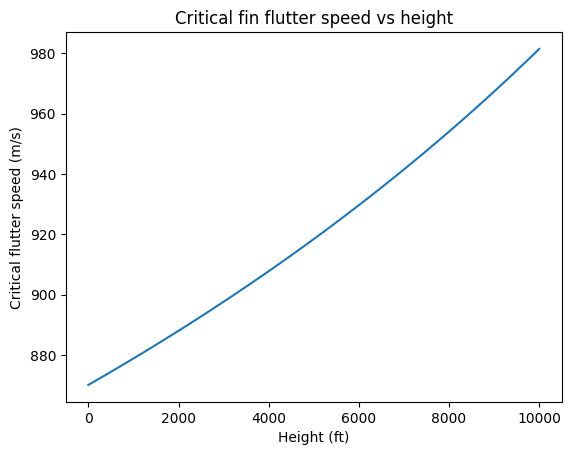

In [2]:
from fin_flutter_calc import flutter_velocity_trapezoidal_fin
import numpy as np

pressure_range = np.linspace(86.4, 62.398, 100) # pressure expected in 10k ft launch at Spaceport America in June
temp_range = np.linspace(34+273.15, 9.1+273.15, 100) # temperature expected in 10k ft launch at Spaceport America in June
height_range = np.linspace(0, 10000, 100) # height range in ft, okay to be imperial because it's just using it for plotting
flutter_speeds = []
for i in range(100):
    input_dict = {
        "G": 4136854, # shear modulus for composites according to https://www.apogeerockets.com/education/downloads/Newsletter615.pdf
        "c_r": 33.1, # root chord, cm
        "c_t": 13.95, # tip chord, cm
        "b": 13.5, # semi-span, cm
        "m": 9.55, # fin sweep length, cm
        "t": 0.865, # thickness, cm
        "P": pressure_range[i], # pressure, kPa
        "T": temp_range[i], # temperature, K
    }
    if i == 17:
        print(flutter_velocity_trapezoidal_fin(input_dict))
    flutter_speeds.append(flutter_velocity_trapezoidal_fin(input_dict))

# plot flutter speeds vs height
import matplotlib.pyplot as plt
plt.plot(height_range, flutter_speeds)
plt.xlabel("Height (ft)")
plt.ylabel("Critical flutter speed (m/s)")
plt.title("Critical fin flutter speed vs height")
plt.show()


mention papers for further reading

### Simulation-Based Approach

There are also simulation-based approaches to calculating fin flutter speeds. These can be more accurate than the analytical approach, however they are typically beyond the scope of what a hobbyist or collegiate rocket team would do, and the effort required to do them is generally not worth the increased accuracy.

For interest sake, a brief overview of how these simulations work is provided below.

Some aeroelastic simulation software that can be used for determining fin flutter speeds are:
- [Siemens NX Nastran](https://plm.sw.siemens.com/en-US/simcenter/mechanical-simulation/nastran/)
- [MSC Nastran](https://hexagon.com/products/product-groups/computer-aided-engineering-software/msc-nastran)
- [ZAERO by Zona Technology](https://www.zonatech.com/zaero.html)